In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# Load the dataset
from data import load_data_viz_data

data = load_data_viz_data()
data[['LAT','LONG']] = data[['LAT','LONG']].astype('float64')

print("Shape of the DataFrame:", data.shape)

data.head()

Shape of the DataFrame: (237221, 9)


,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359


In [4]:
data.groupby(['NAME'])['OFFENSE_CODE_GROUP'].agg(pd.Series.mode).to_frame()

,OFFENSE_CODE_GROUP
NAME,
Brighton,Larceny and vandalism
Charlestown,Larceny and vandalism
Dorchester,Larceny and vandalism
Downtown,Larceny and vandalism
East Boston,Larceny and vandalism
Hyde Park,Larceny and vandalism
Jamaica Plain,Larceny and vandalism
Mattapan,Police investigation procedure
Roxbury,Larceny and vandalism


In [5]:
# Haversine distance function
from math import radians, sin, cos, asin, sqrt

def haversine_distance(lon1, lat1, lon2, lat2):
    """
    Compute distance (km) between two pairs of (lat, lng) coordinates
    See - (https://en.wikipedia.org/wiki/Haversine_formula)
    """
    
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    
    return 2 * 6371 * asin(sqrt(a))

In [6]:
data['haversine_dist']=''

In [7]:
# calculate haversine distance

for i in range(data.shape[0]):
    data.loc[i,'haversine_dist']=haversine_distance(data.loc[i,'LONG'],data.loc[i,'LAT'],data.loc[i,'LONG_POLICE_STATION'],data.loc[i,'LAT_POLICE_STATION'])
data.head(3)

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION,haversine_dist
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359,0.163832
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359,2.145919
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175


In [8]:
data=data.astype({'haversine_dist': 'float64'})

In [9]:
# average distance from crime to police department
pdb_ahs=data.groupby(['NAME'])[['haversine_dist']].mean()
pdb_ahs.rename(columns={'haversine_dist':'avr_haversine_dist'})

,avr_haversine_dist
NAME,
Brighton,3.770867
Charlestown,58.758394
Dorchester,3.174444
Downtown,6.336657
East Boston,5.568626
Hyde Park,2.397613
Jamaica Plain,2.585737
Mattapan,1.908636
Roxbury,2.989029


prepare 5 slides (including a title slide) 
- present to the head of the Police Department

**must be shared either in HTML or in PDF format and saved in the current directory**

- to prepare your data visualisations, do not hesitate to create a separate, blank notebook;
- pay particular attention to the readability and the clarity of your legends, titles, charts and tables;
- the Pandas resample method might be useful if you want to plot time trends;
- keep in mind that you are working with real data and sometimes, data are not very talkative. 
- Do not feel discouraged if your charts do not provide revolutionary insights: typically, an absence of trend is a substantial piece of information!

# Characteristics of crimes in the various districts of Boston

## General characteristics

In [14]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION,haversine_dist
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359,0.163832
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359,2.145919
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175


In [52]:
data.OFFENSE_CODE_GROUP.unique()

array(['Other', 'Violence and harassment', 'Fraud and law violations',
       'Larceny and vandalism', 'Police investigation procedure',
       'Disputes', 'Drugs and disorderly conduct'], dtype=object)

### Most frequent crime - Larceny and vandalism

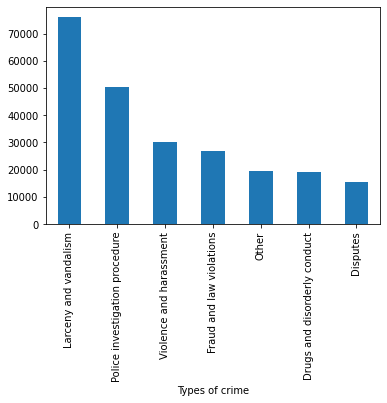

In [79]:
data.OFFENSE_CODE_GROUP.value_counts().plot(kind='bar').set_xlabel("Types of crime");

## Ranking of districts by crime frequency

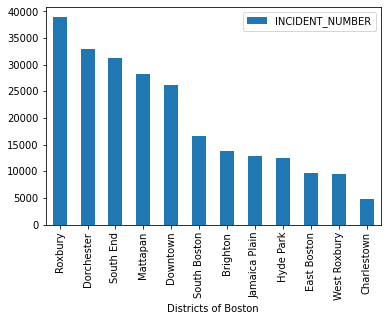

In [74]:
nb_crimes.plot(kind='bar').set_xlabel('Districts of Boston');

`Roxbury` has the highest rate of crimes, followed by `Dorchester` and `South End`.

In [101]:
data.groupby('NAME')[['INCIDENT_NUMBER','OFFENSE_CODE_GROUP']].agg({'INCIDENT_NUMBER':'count','OFFENSE_CODE_GROUP':lambda x:x.value_counts().index[0]})

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP
NAME,,
Brighton,13788,Larceny and vandalism
Charlestown,4765,Larceny and vandalism
Dorchester,32875,Larceny and vandalism
Downtown,26260,Larceny and vandalism
East Boston,9691,Larceny and vandalism
Hyde Park,12551,Larceny and vandalism
Jamaica Plain,12802,Larceny and vandalism
Mattapan,28331,Police investigation procedure
Roxbury,38877,Larceny and vandalism


## Number of crimes per district

Text(0.5, 0, 'Total number of incidents')

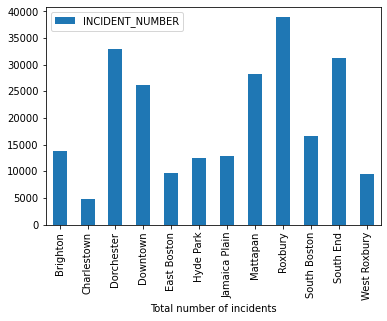

In [83]:
data.groupby('NAME')[['INCIDENT_NUMBER','OFFENSE_CODE_GROUP']].agg({'INCIDENT_NUMBER':'count','OFFENSE_CODE_GROUP':lambda x:x.value_counts().index[0]}).plot(kind='bar').set_xlabel('Total number of incidents')

In [78]:
data.groupby('NAME')[['INCIDENT_NUMBER','OFFENSE_CODE_GROUP','SHOOTING','haversine_dist']].agg({'INCIDENT_NUMBER':'count','OFFENSE_CODE_GROUP':lambda x:x.value_counts().index[0],'SHOOTING':'sum','haversine_dist':'mean'})

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,haversine_dist
NAME,,,,
Brighton,13788,Larceny and vandalism,24,3.770867
Charlestown,4765,Larceny and vandalism,5,58.758394
Dorchester,32875,Larceny and vandalism,239,3.174444
Downtown,26260,Larceny and vandalism,19,6.336657
East Boston,9691,Larceny and vandalism,23,5.568626
Hyde Park,12551,Larceny and vandalism,40,2.397613
Jamaica Plain,12802,Larceny and vandalism,86,2.585737
Mattapan,28331,Police investigation procedure,297,1.908636
Roxbury,38877,Larceny and vandalism,487,2.989029


In [60]:
data.groupby(['NAME','OFFENSE_CODE_GROUP'])[['OFFENSE_CODE_GROUP']].count()

OFFENSE_CODE_GROUP
NAME         OFFENSE_CODE_GROUP                                
Brighton     Disputes                                       563
             Drugs and disorderly conduct                   809
             Fraud and law violations                      1807
             Larceny and vandalism                         5274
             Other                                          925
...                                                         ...
West Roxbury Fraud and law violations                      1168
             Larceny and vandalism                         2915
             Other                                          880
             Police investigation procedure                2036
             Violence and harassment                       1089

[84 rows x 1 columns]

## Number of crimes per district

In [63]:
nb_crimes =data.groupby('NAME')[['INCIDENT_NUMBER']].count().sort_values(by='INCIDENT_NUMBER',ascending=False)
nb_crimes

,INCIDENT_NUMBER
NAME,
Roxbury,38877
Dorchester,32875
South End,31258
Mattapan,28331
Downtown,26260
South Boston,16617
Brighton,13788
Jamaica Plain,12802
Hyde Park,12551


## Number of offences per crime (and per district)

In [11]:
# offense cat by incident id
data.groupby('INCIDENT_NUMBER')[['OFFENSE_CODE_GROUP']].count().sort_values(by='OFFENSE_CODE_GROUP',ascending=False)

,OFFENSE_CODE_GROUP
INCIDENT_NUMBER,
I172053750,18
I130041200-00,13
I162030584,13
I182093742,12
I162067346,12
...,...
I162071638,1
I162071639,1
I162071640,1


## Observed correlation between the number of crimes and shootings

In [95]:
# YOUR CODE HERE
pdb_ahs=data.groupby(['NAME'])[['INCIDENT_NUMBER','SHOOTING','haversine_dist']]\
.agg({'SHOOTING':'sum','INCIDENT_NUMBER':'count','haversine_dist':'mean'})
pdb_ahs_renamed=pdb_ahs.rename(columns={'haversine_dist':'avr_haversine_dist','INCIDENT_NUMBER':'nb_of_crimes'})
pdb_ahs_renamed

,SHOOTING,nb_of_crimes,avr_haversine_dist
NAME,,,
Brighton,24,13788,3.770867
Charlestown,5,4765,58.758394
Dorchester,239,32875,3.174444
Downtown,19,26260,6.336657
East Boston,23,9691,5.568626
Hyde Park,40,12551,2.397613
Jamaica Plain,86,12802,2.585737
Mattapan,297,28331,1.908636
Roxbury,487,38877,2.989029


## How important is the distance to police department?

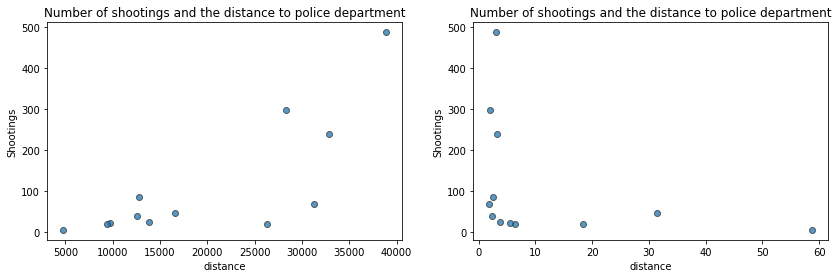

In [98]:
plt.figure(figsize=(14, 4))

plt.subplot(1, 2, 1)
plt.scatter(pdb_ahs_renamed['nb_of_crimes'], pdb_ahs_renamed['SHOOTING'], edgecolor='#333333', alpha=0.75)

#plt.xscale('log')
#plt.yscale('log')

plt.title('Number of shootings and the distance to police department')
plt.xlabel('distance')
plt.ylabel('Shootings')


plt.subplot(1, 2, 2)
plt.scatter(pdb_ahs_renamed['avr_haversine_dist'], pdb_ahs_renamed['SHOOTING'], edgecolor='#333333', alpha=0.75)

#plt.xscale('log')
#plt.yscale('log')

plt.title('Number of shootings and the distance to police department')
plt.xlabel('distance')
plt.ylabel('Shootings')
plt.show()

- We observe that the number of **shootings** increases with the number of **crimes**
- The **distance to police department** doesn't show relation with number of **shootings**.

## Average distance per district

In [86]:
# YOUR CODE HERE
pdb_ahs=data.groupby(['NAME'])[['INCIDENT_NUMBER','haversine_dist']].agg({'INCIDENT_NUMBER':'count','haversine_dist':'mean'})
pdb_ahs_renamed=pdb_ahs.rename(columns={'haversine_dist':'avr_haversine_dist','INCIDENT_NUMBER':'nb_of_crimes'})
pdb_ahs_renamed

,nb_of_crimes,avr_haversine_dist
NAME,,
Brighton,13788,3.770867
Charlestown,4765,58.758394
Dorchester,32875,3.174444
Downtown,26260,6.336657
East Boston,9691,5.568626
Hyde Park,12551,2.397613
Jamaica Plain,12802,2.585737
Mattapan,28331,1.908636
Roxbury,38877,2.989029


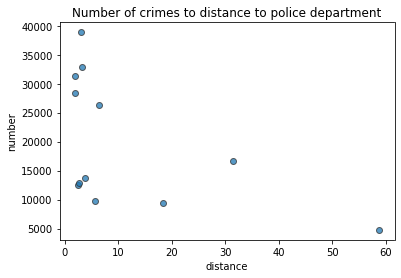

In [102]:
plt.scatter(pdb_ahs_renamed['avr_haversine_dist'], pdb_ahs_renamed['nb_of_crimes'], edgecolor='#333333', alpha=0.75)

#plt.xscale('log')
#plt.yscale('log')

plt.title('Number of crimes to distance to police department')
plt.xlabel('distance')
plt.ylabel('number')
plt.show()

`Weak negative relation` observed between the distance to police department and the total number of crimes.

## Average time of crime per district

In [18]:
from datetime import datetime

In [19]:
data.OCCURRED_ON_DATE

0         2015-08-28 10:20:00
1         2015-09-14 09:31:00
2         2015-07-12 15:37:00
3         2015-07-12 15:37:00
4         2015-07-12 15:37:00
                 ...         
237216    2018-08-09 18:00:00
237217    2018-08-09 18:00:00
237218    2018-12-12 05:00:00
237219    2018-12-12 05:00:00
237220    2018-12-12 05:00:00
Name: OCCURRED_ON_DATE, Length: 237221, dtype: object

In [23]:
data['date_time']=pd.to_datetime(data.OCCURRED_ON_DATE, format = '%Y-%m-%d %H:%M:%S')

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237221 entries, 0 to 237220
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      237221 non-null  object        
 1   OFFENSE_CODE_GROUP   237221 non-null  object        
 2   SHOOTING             237221 non-null  int64         
 3   OCCURRED_ON_DATE     237221 non-null  object        
 4   LAT                  237221 non-null  float64       
 5   LONG                 237221 non-null  float64       
 6   NAME                 237221 non-null  object        
 7   LAT_POLICE_STATION   237221 non-null  float64       
 8   LONG_POLICE_STATION  237221 non-null  float64       
 9   haversine_dist       237221 non-null  float64       
 10  date_time            237221 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 29.8+ MB


In [48]:
data.head()

,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,SHOOTING,OCCURRED_ON_DATE,LAT,LONG,NAME,LAT_POLICE_STATION,LONG_POLICE_STATION,haversine_dist,date_time
0,I192068249,Other,0,2015-08-28 10:20:00,42.330119,-71.084251,Roxbury,42.328894,-71.085359,0.163832,2015-08-28 10:20:00
1,I182074094,Violence and harassment,0,2015-09-14 09:31:00,42.315142,-71.067047,Roxbury,42.328894,-71.085359,2.145919,2015-09-14 09:31:00
2,I182054888,Violence and harassment,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175,2015-07-12 15:37:00
3,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175,2015-07-12 15:37:00
4,I182054888,Other,0,2015-07-12 15:37:00,42.312243,-71.075499,Roxbury,42.328894,-71.085359,2.021175,2015-07-12 15:37:00


In [50]:
data.groupby('NAME')[['date_time']].agg(lambda x:x.value_counts().index[0])

,date_time
NAME,
Brighton,2015-09-27 20:29:00
Charlestown,2016-08-22 10:25:00
Dorchester,2016-04-20 11:07:00
Downtown,2015-06-16 15:55:00
East Boston,2017-06-26 14:50:00
Hyde Park,2018-06-04 12:40:00
Jamaica Plain,2015-09-25 18:30:00
Mattapan,2015-12-07 11:38:00
Roxbury,2015-10-02 21:00:00
